In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
 #Load the dataset
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [9]:
# Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
df.shape

(1338, 7)

In [11]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [13]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 1


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(1337, 7)

In [17]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


# Exploratory Data Analysis

In [18]:
#Summary of Categorical Features
print("Sex distribution:\n", df['sex'].value_counts())
print("Smoker distribution:\n", df['smoker'].value_counts())
print("Region distribution:\n", df['region'].value_counts())

Sex distribution:
 sex
male      675
female    662
Name: count, dtype: int64
Smoker distribution:
 smoker
no     1063
yes     274
Name: count, dtype: int64
Region distribution:
 region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


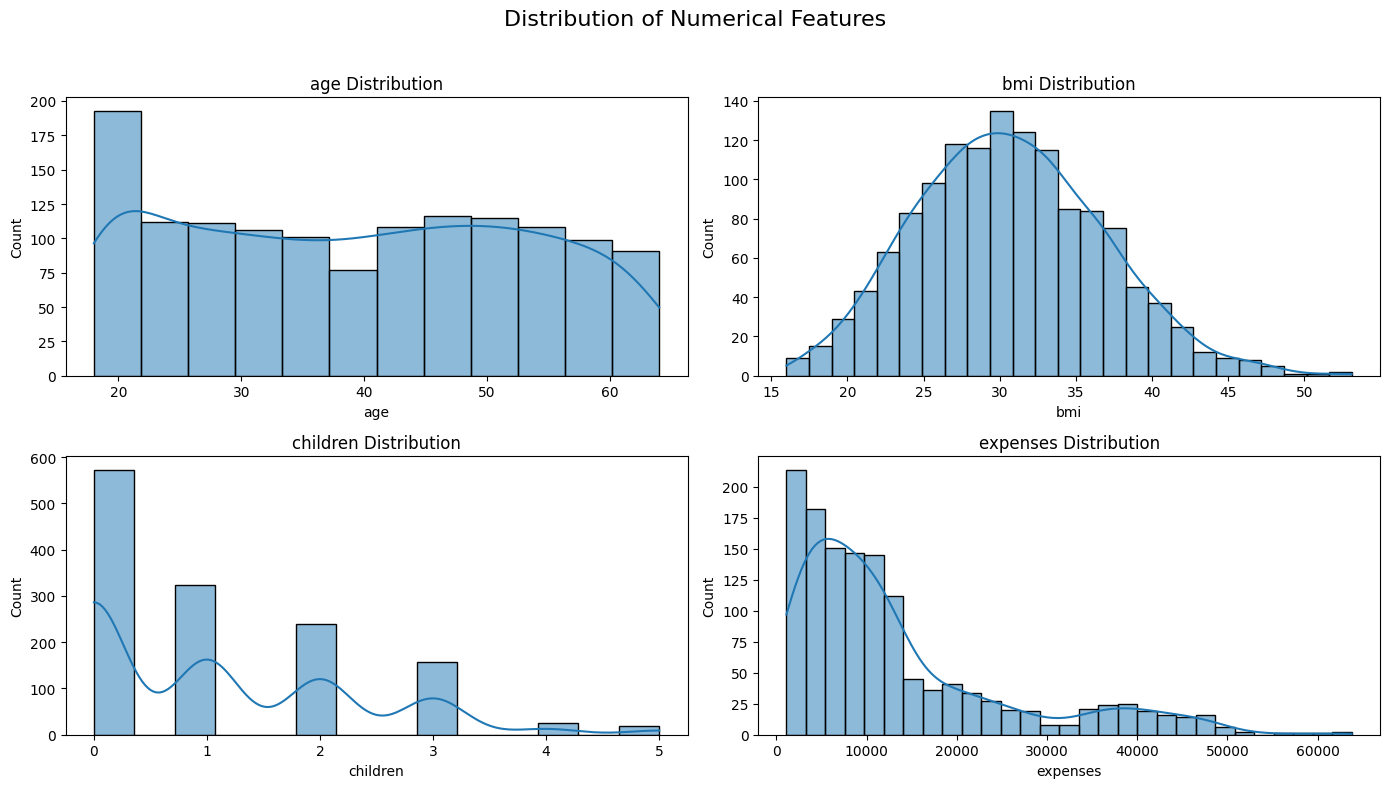

In [19]:
# Distribution of numerical features
plt.figure(figsize=(14, 8))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
for i, col in enumerate(['age', 'bmi', 'children', 'expenses'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Age: Ages range from 18 to 64, with a peak around the late 30s and early 40s. This suggests a higher number of mid-aged individuals in the dataset.

BMI: The BMI values range from 16 to about 53, with most individuals clustered around 30. This could indicate a trend toward higher-than-average BMIs.

Children: The number of children per individual varies from 0 to 5, with 0 and 1 children being the most common, suggesting a significant portion of individuals with fewer dependents.

Expenses: Insurance expenses range widely from about 1,122 to 63,770. A large concentration is seen around lower expense values, but there are some high-cost outliers, likely due to factors like smoking status or age.

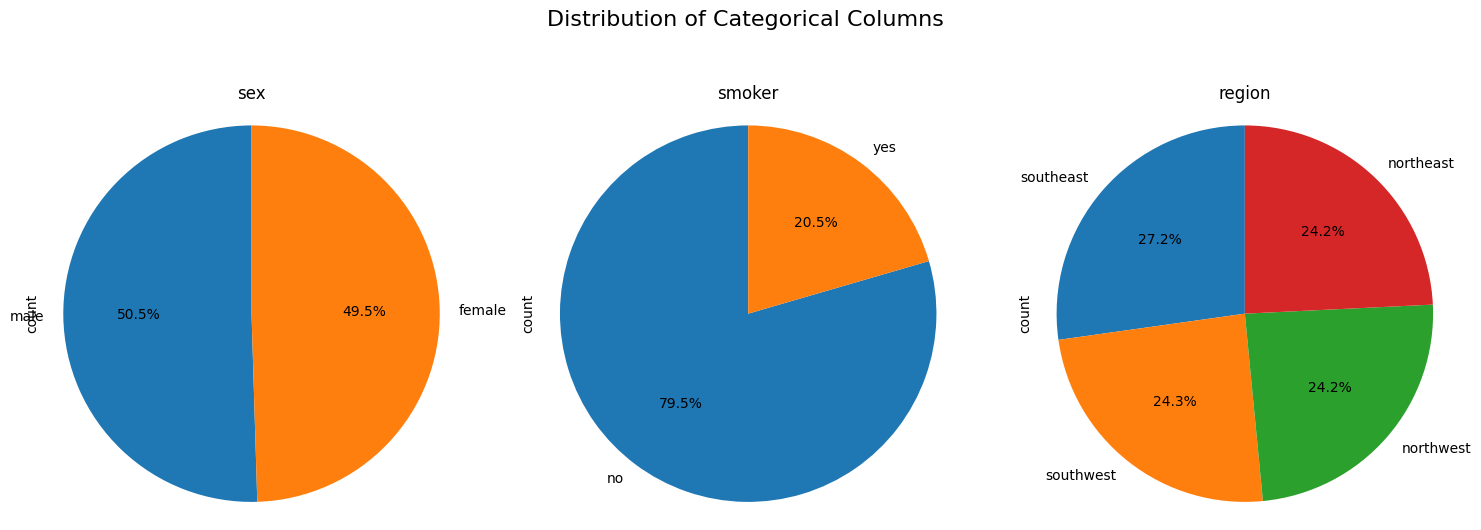

In [20]:
# Distribution of categorical features
# Count plots for categorical features with a subtitle
categorical_columns = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_columns)

# Set up the figure and axes
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))
fig.suptitle("Distribution of Categorical Columns", fontsize=16, y=1.05)  # Add subtitle

# Create a pie chart for each categorical column
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i], startangle=90)
    axes[i].set_title(col)
    axes[i].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.tight_layout()
plt.show()


Sex: There’s a roughly equal distribution of males (50.4%) and females (49.6%).

Smoker: Non-smokers constitute about 79.5% of the dataset, indicating smoking is relatively less common.

Region: The dataset is well-distributed across four regions (Southeast, Southwest, Northwest, Northeast), with a slight edge for Southeast (27%).

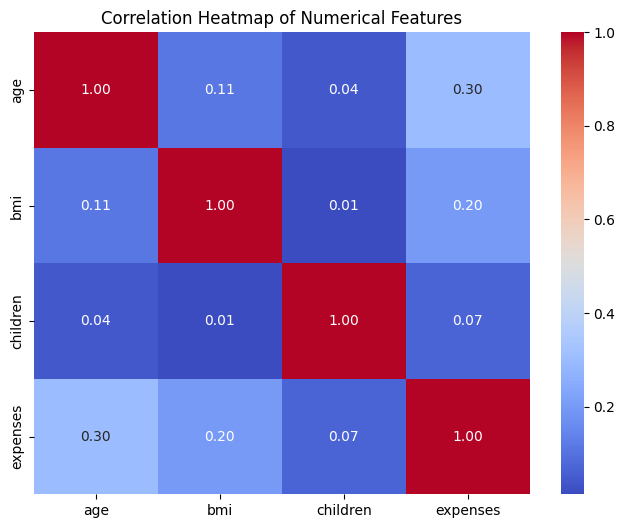

In [21]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'bmi', 'children', 'expenses']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


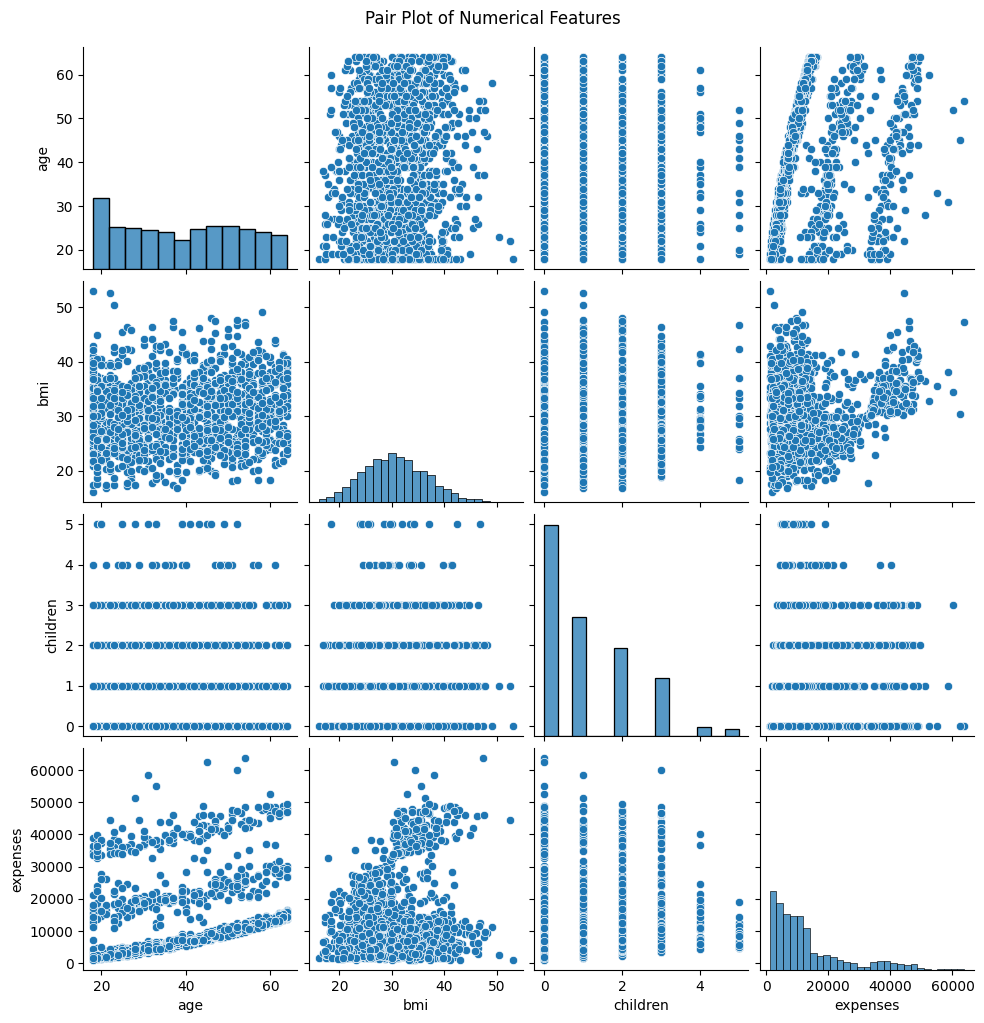

In [22]:
# Pairplot for numerical features
sns.pairplot(df[['age', 'bmi', 'children', 'expenses']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

Expenses show a clearer relationship with age and smoker status when compared across these variables.

**Boxplot**

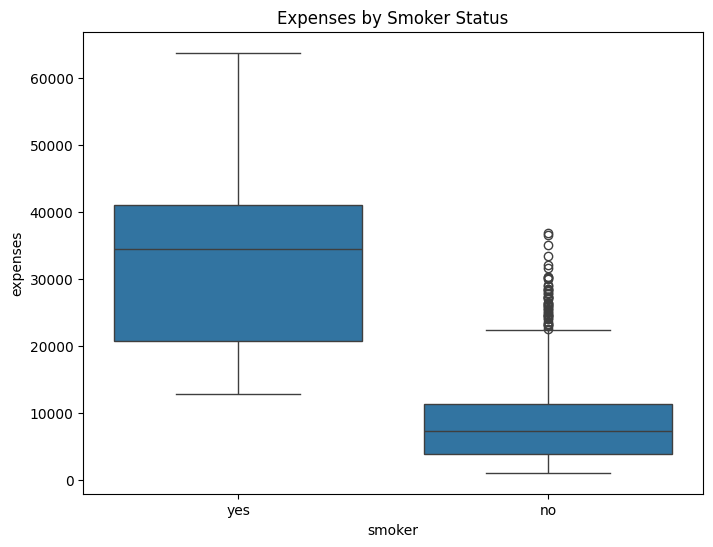

In [23]:
# Boxplot for Expenses by Smoker Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='expenses')
plt.title('Expenses by Smoker Status')
plt.show()

Non-smokers generally have expenses below 20,000, while smokers’ expenses often exceed this amount.

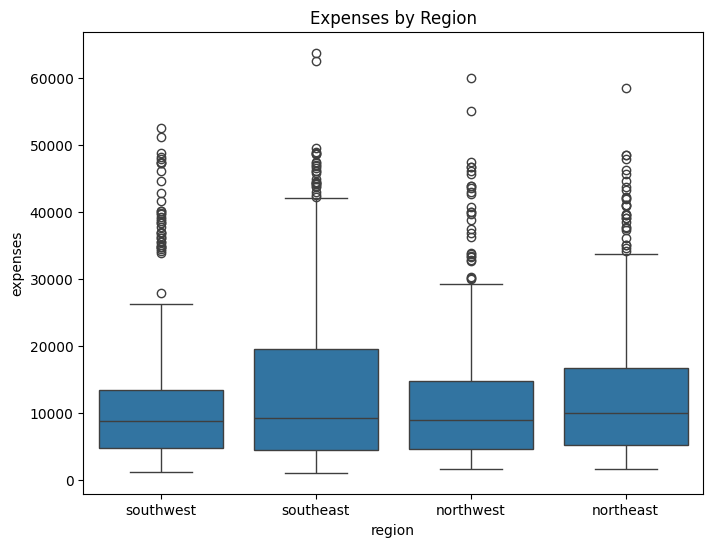

In [24]:
# Boxplot for Expenses by Region
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='region', y='expenses')
plt.title('Expenses by Region')
plt.show()

While expenses are relatively similar across regions, the southeast has some high-cost outliers.

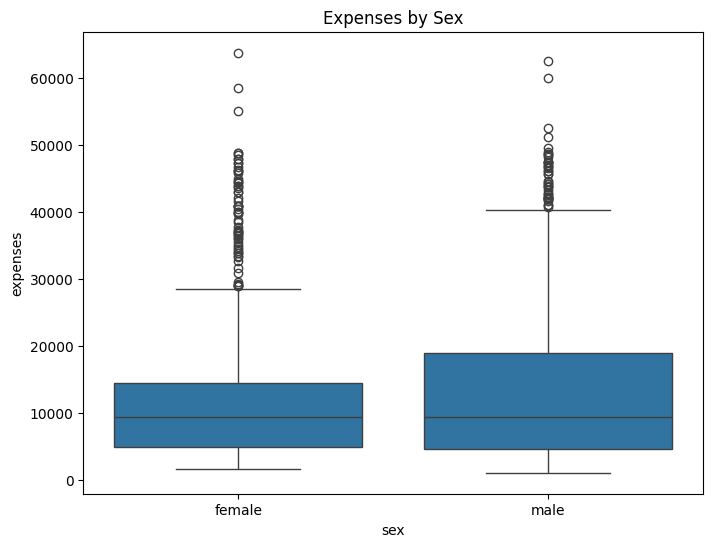

In [25]:
# Boxplot for Expenses by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='expenses')
plt.title('Expenses by Sex')
plt.show()

No substantial difference between male and female expenses, though there is some variance.

**Strip Plot for Expenses by Categorical Features**

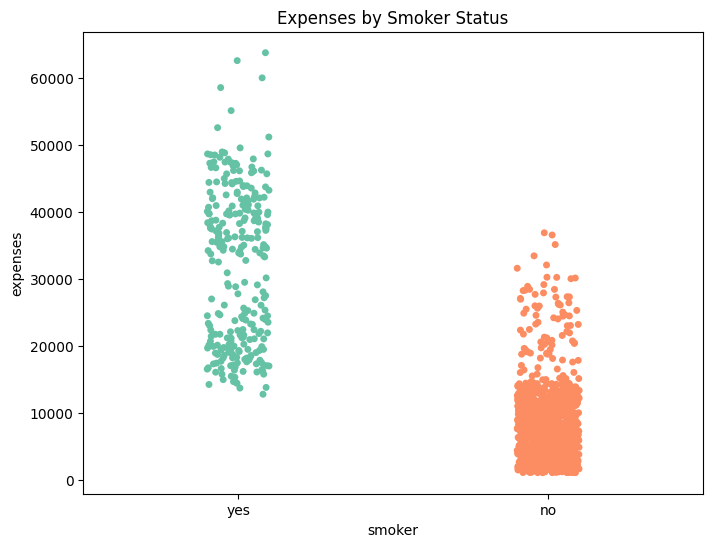

In [26]:
#Strip Plot for Expenses by Categorical Features
# Strip Plot for Expenses by Smoker Status
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='smoker', y='expenses', jitter=True, palette='Set2')
plt.title('Expenses by Smoker Status')
plt.show()

The strip plot reiterates the high expense concentration among smokers compared to non-smokers, with a clearer view of expense spread within each group.

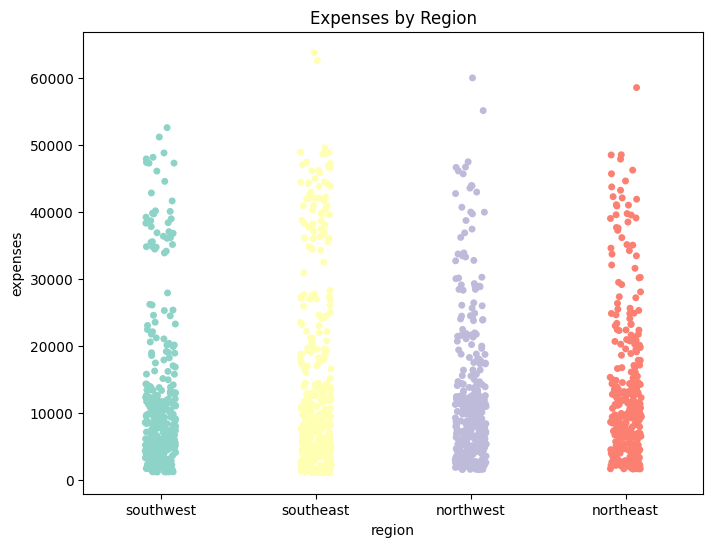

In [27]:
# Strip Plot for Expenses by Region
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='region', y='expenses', jitter=True, palette='Set3')
plt.title('Expenses by Region')
plt.show()

Again, Southeast shows higher expense points compared to other regions, aligning with observations from the boxplot.

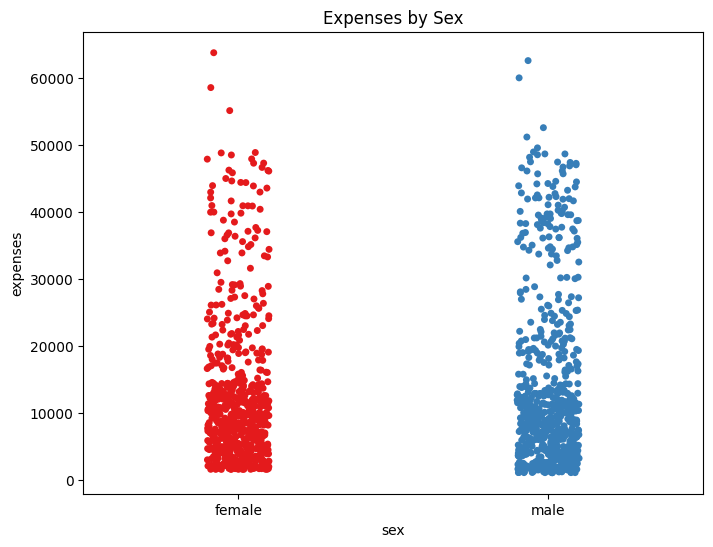

In [28]:
# Strip Plot for Expenses by Sex
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='sex', y='expenses', jitter=True, palette='Set1')
plt.title('Expenses by Sex')
plt.show()

This plot confirms the earlier observation that expenses are similar between males and females with minor variations.

**Scatter plots to Analyze Relationships with Expenses**

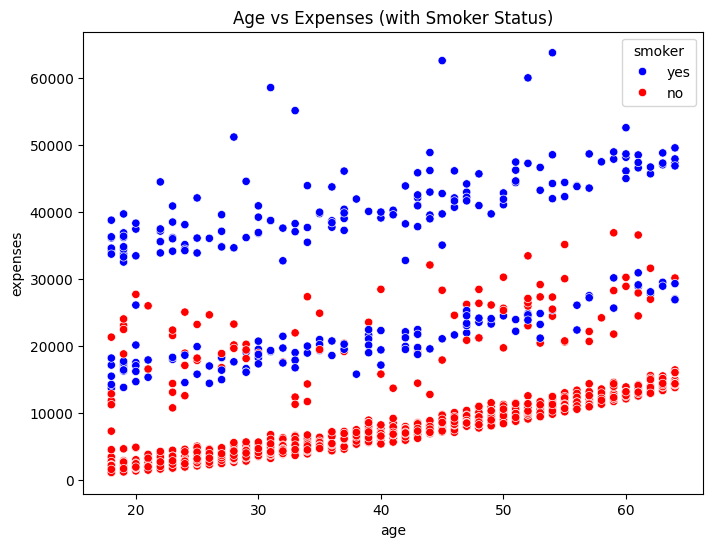

In [29]:
#Scatter Plots to Analyze Relationships with Expenses
# Scatter plot of Age vs Expenses
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='expenses', hue='smoker', palette=['blue', 'red'])
plt.title('Age vs Expenses (with Smoker Status)')
plt.show()


There’s a clear trend where older smokers have higher expenses. While expenses increase with age for both groups, the increase is sharper for smokers.

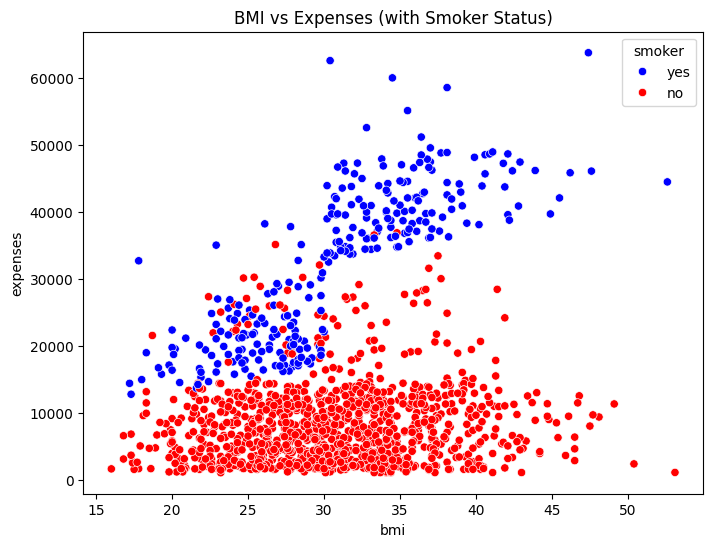

In [30]:
# Scatter plot of BMI vs Expenses
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker', palette=['blue', 'red'])
plt.title('BMI vs Expenses (with Smoker Status)')
plt.show()

Higher BMI correlates with higher expenses, particularly for smokers. This suggests that individuals with higher BMI and smoking habits may face higher medical costs.

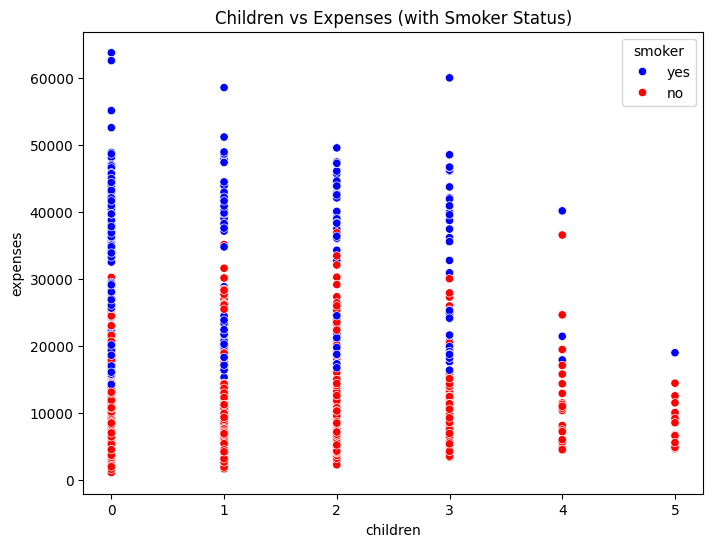

In [31]:
# Scatter plot of Children vs Expenses
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='children', y='expenses', hue='smoker', palette=['blue', 'red'])
plt.title('Children vs Expenses (with Smoker Status)')
plt.show()

Individuals with more children don’t necessarily have higher expenses, but smokers generally incur more costs than non-smokers across all family sizes.

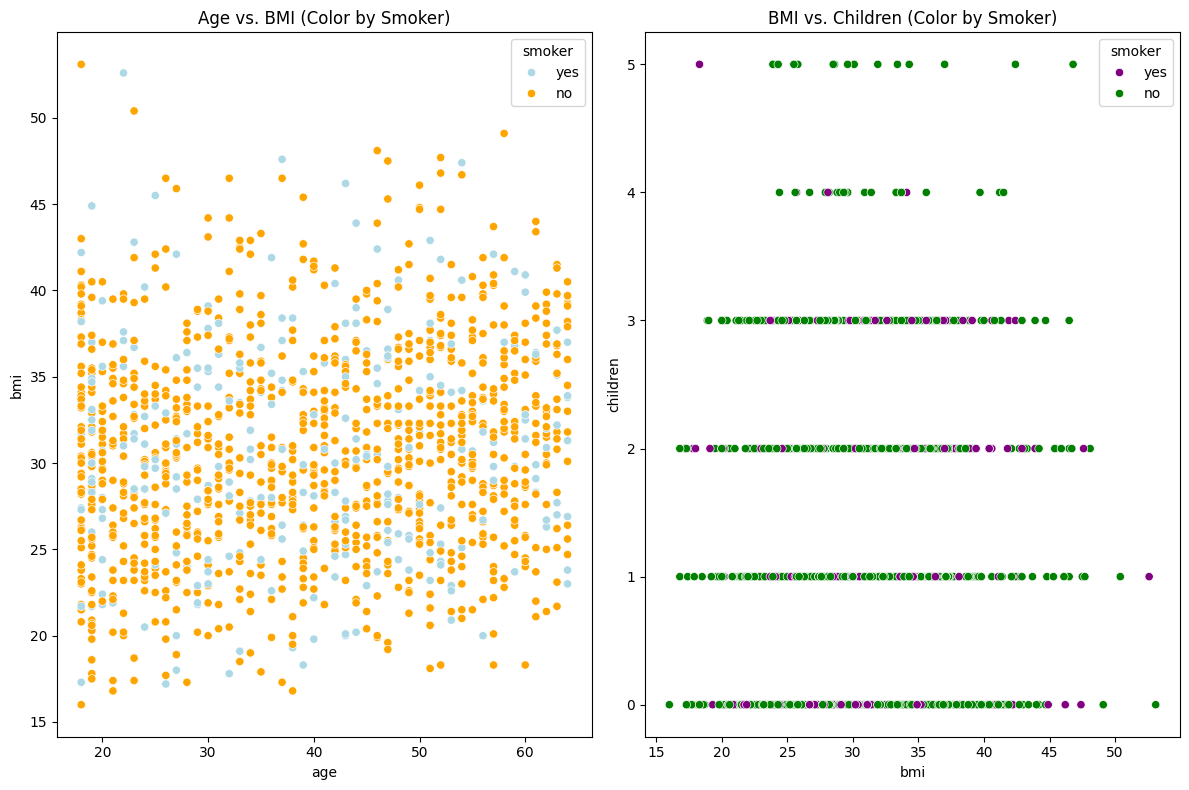

In [32]:
# Scatter Plots for Selected Numerical Features
plt.figure(figsize=(12, 8))

# Scatter plot for Age vs. BMI
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', palette=['lightblue', 'orange'])
plt.title('Age vs. BMI (Color by Smoker)')

# Scatter plot for BMI vs. Children
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bmi', y='children', hue='smoker', palette=['purple', 'green'])
plt.title('BMI vs. Children (Color by Smoker)')

plt.tight_layout()
plt.show()


Age vs. BMI: Smokers appear distributed across all age and BMI levels, but those with high BMI and age likely face higher health costs.

BMI vs. Children: No significant trend is observed here between BMI and the number of children, but smokers are again evenly distributed.

**Count Distribution of Sex by Region and Smoker Status**

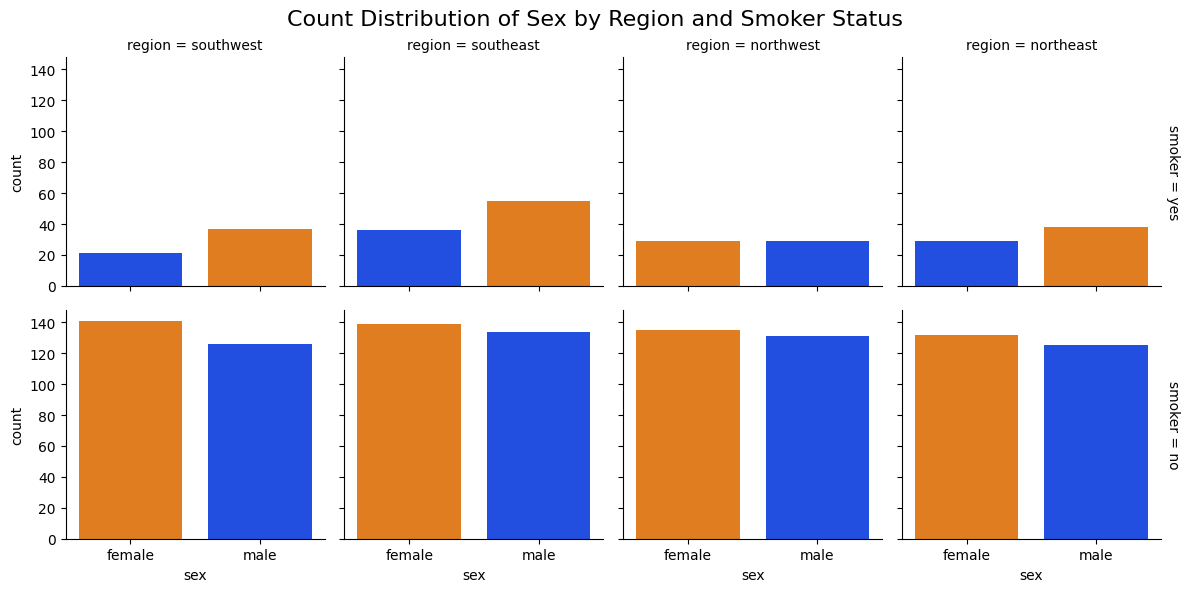

In [33]:

# Create a FacetGrid for 'region' and 'smoker' with 'sex' count distribution
graph = sns.FacetGrid(data=df, col="region", row="smoker", margin_titles=True)
graph.map(sns.countplot, "sex", palette="bright")

# Add overall title and show the plot
graph.fig.suptitle('Count Distribution of Sex by Region and Smoker Status', fontsize=16)
graph.fig.tight_layout()  # Adjust layout to prevent overlapping
graph.fig.subplots_adjust(top=0.9)  # Adjust the title position

plt.show()

 It seems like there's a similar count of males and females across groups, with some slight variations by region and smoker status.

**To plot histograms for all numerical columns, comparing each between smokers and non-smokers.**

In [34]:
num = df.select_dtypes(['int64','float64']).columns
num

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

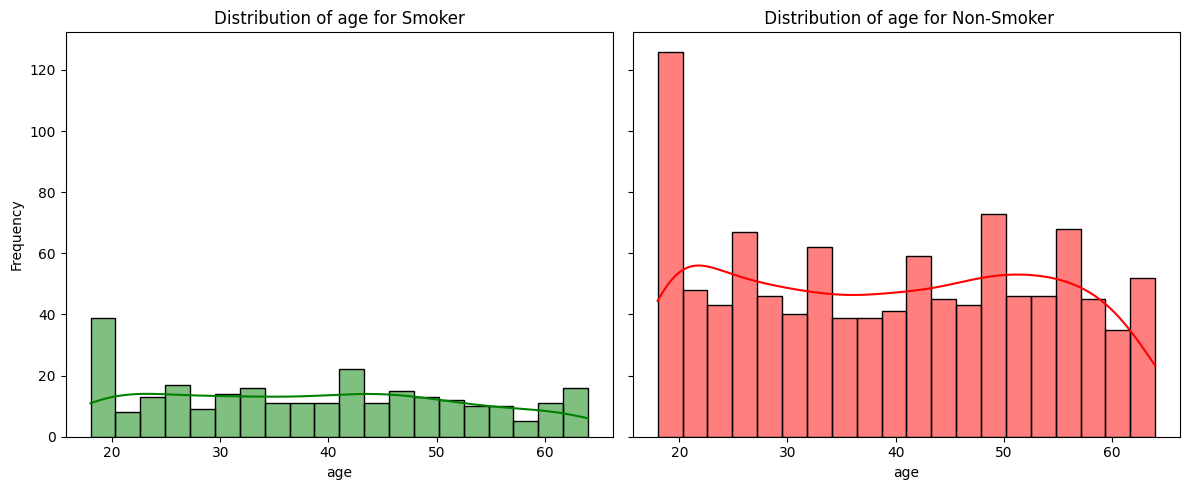

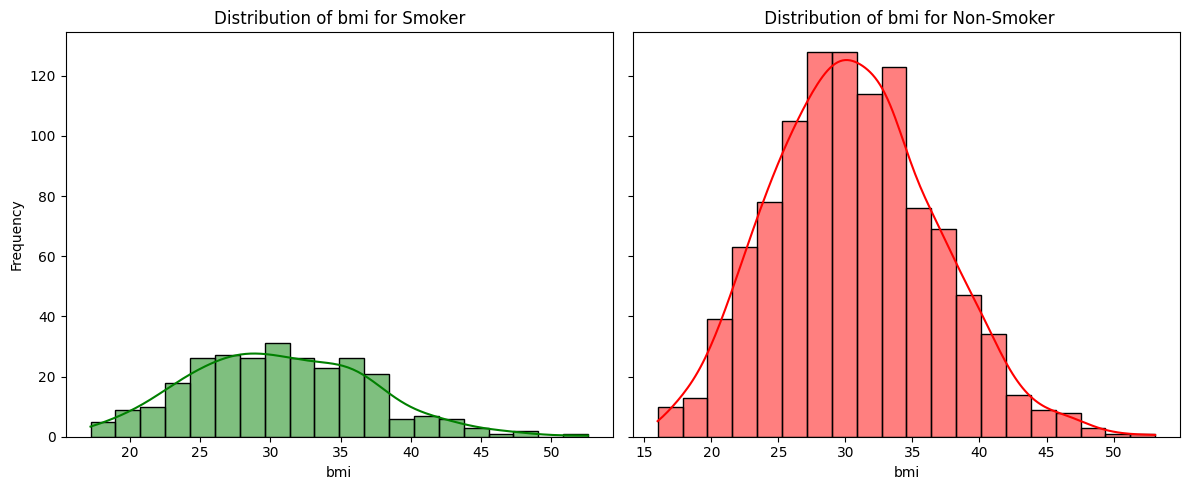

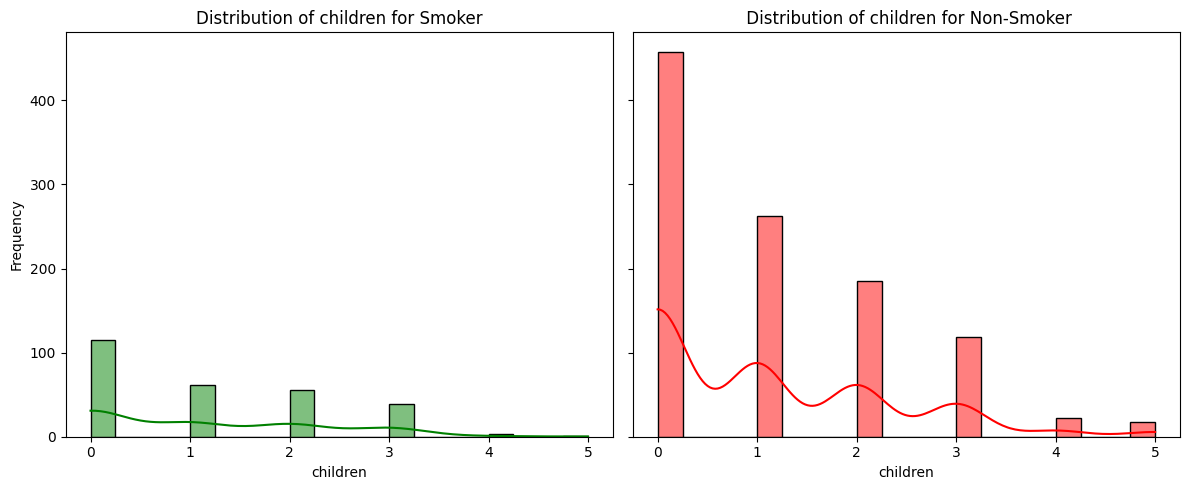

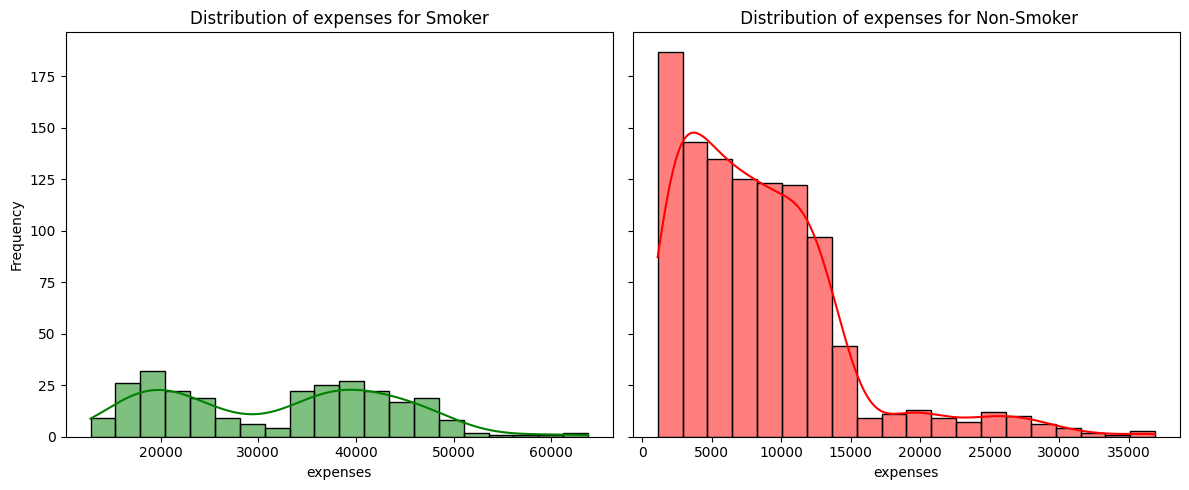

In [35]:
for col in num:
    # Create subplots for each numerical column
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Plot for smokers
    sns.histplot(df[df['smoker'] == 'yes'][col], bins=20, kde=True, ax=axes[0], color='green')
    axes[0].set_title(f'Distribution of {col} for Smoker')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Plot for non-smokers
    sns.histplot(df[df['smoker'] == 'no'][col], bins=20, kde=True, ax=axes[1], color='red')
    axes[1].set_title(f' Distribution of {col} for Non-Smoker')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


### Encoding Categorical Columns

**Enoding the values in the sex column to 0 and 1**

In [36]:
# sex column to 0 and 1

df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


**Enoding the values in the smoker column to 0 and 1**

In [37]:
# smoker column to 0 and 1
smokers = {'no' : 0 , 'yes':1 }
df['smoker'] = df['smoker'].apply(lambda x : smokers[x])
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


**Encoding the data in the Region column for them to be 0 , 1 , 2 ,3.**

In [38]:
regions = {'southwest' : 0, 'southeast' : 1, 'northwest' : 2 , 'northeast' : 3}
df['region'] = df['region'].apply(lambda x : regions[x])
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


or by using label encoder

In [39]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df

'''

"\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndf['region'] = le.fit_transform(df['region'])\ndf\n\n"

### Scalling the data

from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['age', 'bmi', 'children', 'expenses']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
sex,1337.0,0.504862,0.500163,0.00,0.00,1.00,1.00,1.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
smoker,1337.0,0.204936,0.403806,0.00,0.00,0.00,0.00,1.00
region,1337.0,1.483919,1.105208,0.00,1.00,1.00,2.00,3.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


# Model Building

## 1. Multi linear Regression


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Separate features and target variable
X = df.drop(columns=['expenses'])
y = df['expenses']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Training set performance
y_train_pred_linear = linear_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred_linear, squared=False)
train_r2 = r2_score(y_train, y_train_pred_linear)
train_mae = mean_absolute_error(y_train, y_train_pred_linear)

# Test set performance
y_test_pred_linear = linear_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred_linear, squared=False)
test_r2 = r2_score(y_test, y_test_pred_linear)
test_mae = mean_absolute_error(y_test, y_test_pred_linear)

# Print results clearly separating training and test performance
print("Multiple Linear Regression - Training Performance:")
print("RMSE:", train_rmse)
print("R² Score:", train_r2)
print("Mean Absolute Error (MAE):", train_mae)
print("\n")

print("Multiple Linear Regression - Test Performance:")
print("RMSE:", test_rmse)
print("R² Score:", test_r2)
print("Mean Absolute Error (MAE):", test_mae)

Multiple Linear Regression - Training Performance:
RMSE: 6082.908328662978
R² Score: 0.7297457314007713
Mean Absolute Error (MAE): 4181.1718221100045


Multiple Linear Regression - Test Performance:
RMSE: 5957.895761137906
R² Score: 0.8068280291899952
Mean Absolute Error (MAE): 4182.597271311557


## 2. Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Training set performance
y_train_pred_lasso = lasso_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
train_r2 = r2_score(y_train, y_train_pred_lasso)
train_mae = mean_absolute_error(y_train, y_train_pred_lasso)

# Test set performance
y_test_pred_lasso = lasso_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
test_r2 = r2_score(y_test, y_test_pred_lasso)
test_mae = mean_absolute_error(y_test, y_test_pred_lasso)

# Print results clearly separating training and test performance
print("Lasso Regression - Training Performance:")
print("RMSE:", train_rmse)
print("R² Score:", train_r2)
print("Mean Absolute Error (MAE):", train_mae)
print("\n")

print("Lasso Regression - Test Performance:")
print("RMSE:", test_rmse)
print("R² Score:", test_r2)
print("Mean Absolute Error (MAE):", test_mae)


Lasso Regression - Training Performance:
RMSE: 6082.908339237883
R² Score: 0.7297457304611177
Mean Absolute Error (MAE): 4181.205850272448


Lasso Regression - Test Performance:
RMSE: 5957.973718774275
R² Score: 0.8068229739391536
Mean Absolute Error (MAE): 4182.667234508131


## 3. Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit the model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Training set performance
y_train_pred_ridge = ridge_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
train_r2 = r2_score(y_train, y_train_pred_ridge)
train_mae = mean_absolute_error(y_train, y_train_pred_ridge)

# Test set performance
y_test_pred_ridge = ridge_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
test_r2 = r2_score(y_test, y_test_pred_ridge)
test_mae = mean_absolute_error(y_test, y_test_pred_ridge)

# Print results clearly separating training and test performance
print("Ridge Regression - Training Performance:")
print("RMSE:", train_rmse)
print("R² Score:", train_r2)
print("Mean Absolute Error (MAE):", train_mae)
print("\n")

print("Ridge Regression - Test Performance:")
print("RMSE:", test_rmse)
print("R² Score:", test_r2)
print("Mean Absolute Error (MAE):", test_mae)


Ridge Regression - Training Performance:
RMSE: 6082.910735850795
R² Score: 0.7297455175054184
Mean Absolute Error (MAE): 4182.05187226669


Ridge Regression - Test Performance:
RMSE: 5959.339289313598
R² Score: 0.8067344112501251
Mean Absolute Error (MAE): 4184.190884030241


## 4. Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Training set performance
y_train_pred_dt = dt_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred_dt, squared=False)
train_r2 = r2_score(y_train, y_train_pred_dt)
train_mae = mean_absolute_error(y_train, y_train_pred_dt)

# Test set performance
y_test_pred_dt = dt_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred_dt, squared=False)
test_r2 = r2_score(y_test, y_test_pred_dt)
test_mae = mean_absolute_error(y_test, y_test_pred_dt)

# Print results clearly separating training and test performance
print("Decision Tree - Training Performance:")
print("RMSE:", train_rmse)
print("R² Score:", train_r2)
print("Mean Absolute Error (MAE):", train_mae)
print("\n")

print("Decision Tree - Test Performance:")
print("RMSE:", test_rmse)
print("R² Score:", test_r2)
print("Mean Absolute Error (MAE):", test_mae)


Decision Tree - Training Performance:
RMSE: 0.0
R² Score: 1.0
Mean Absolute Error (MAE): 0.0


Decision Tree - Test Performance:
RMSE: 6577.238798819703
R² Score: 0.7645788214252829
Mean Absolute Error (MAE): 3062.271791044776


## 5. Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance_df

,Feature,Importance
0,age,0.136957
1,sex,0.007597
2,bmi,0.214487
3,children,0.023320
4,smoker,0.600777
5,region,0.016861


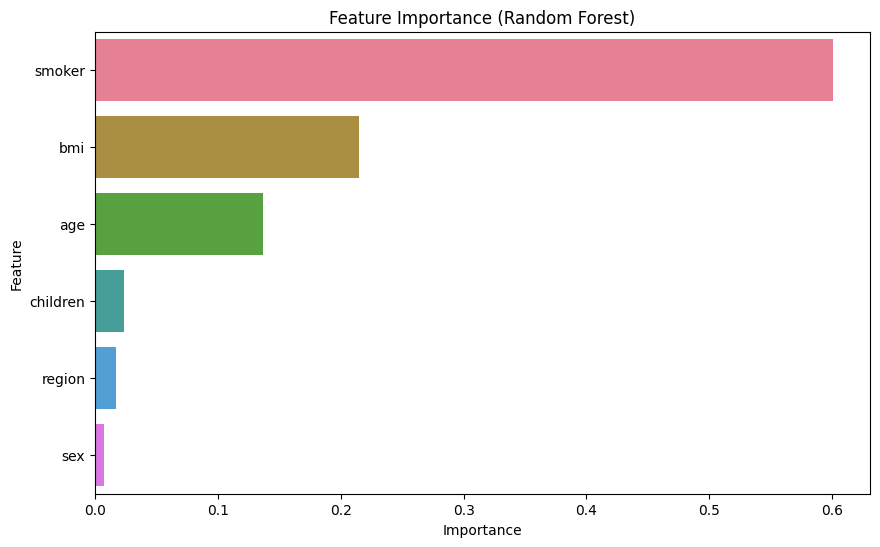

In [47]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create a color palette with the desired number of colors
num_features = len(feature_importance_df)
palette = sns.color_palette("husl", num_features)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, y='Feature', x='Importance', palette=palette)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [48]:
# Training set performance
y_train_pred_rf = rf_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred_rf, squared=False)
train_r2 = r2_score(y_train, y_train_pred_rf)
train_mae = mean_absolute_error(y_train, y_train_pred_rf)

# Test set performance
y_test_pred_rf = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred_rf, squared=False)
test_r2 = r2_score(y_test, y_test_pred_rf)
test_mae = mean_absolute_error(y_test, y_test_pred_rf)

# Print results clearly separating training and test performance
print("Random Forest - Training Performance:")
print("RMSE:", train_rmse)
print("R² Score:", train_r2)
print("Mean Absolute Error (MAE):", train_mae)
print("\n")

print("Random Forest - Test Performance:")
print("RMSE:", test_rmse)
print("R² Score:", test_r2)
print("Mean Absolute Error (MAE):", test_mae)


Random Forest - Training Performance:
RMSE: 1891.2238585646783
R² Score: 0.9738762273687759
Mean Absolute Error (MAE): 1038.0716234798879


Random Forest - Test Performance:
RMSE: 4643.48648455113
R² Score: 0.8826598386212051
Mean Absolute Error (MAE): 2574.4164156716406


## 6. Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [50]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
})
feature_importance_df

,Feature,Importance
0,age,0.122451
1,sex,0.001056
2,bmi,0.184794
3,children,0.013520
4,smoker,0.674905
5,region,0.003275


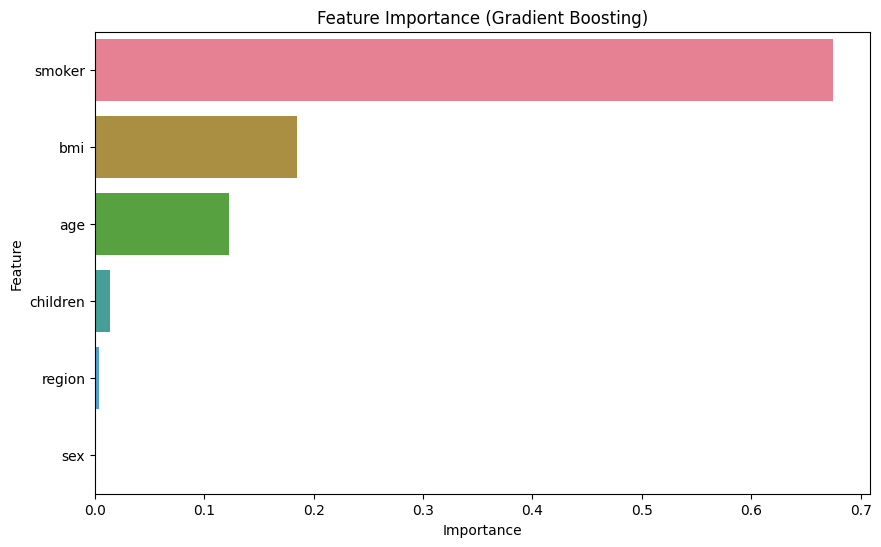

In [51]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create a color palette with the desired number of colors
num_features = len(feature_importance_df)
palette = sns.color_palette("husl", num_features)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, y='Feature', x='Importance', palette=palette)
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [52]:
# Training set performance
y_train_pred_gb = gb_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred_gb, squared=False)
train_r2 = r2_score(y_train, y_train_pred_gb)
train_mae = mean_absolute_error(y_train, y_train_pred_gb)

# Test set performance
y_test_pred_gb = gb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred_gb, squared=False)
test_r2 = r2_score(y_test, y_test_pred_gb)
test_mae = mean_absolute_error(y_test, y_test_pred_gb)

# Print results clearly separating training and test performance
print("Gradient Boosting - Training Performance:")
print("RMSE:", train_rmse)
print("R² Score:", train_r2)
print("Mean Absolute Error (MAE):", train_mae)
print("\n")

print("Gradient Boosting - Test Performance:")
print("RMSE:", test_rmse)
print("R² Score:", test_r2)
print("Mean Absolute Error (MAE):", test_mae)


Gradient Boosting - Training Performance:
RMSE: 3917.672775486628
R² Score: 0.8878998131733726
Mean Absolute Error (MAE): 2147.376267845727


Gradient Boosting - Test Performance:
RMSE: 4360.728581120734
R² Score: 0.8965152339546963
Mean Absolute Error (MAE): 2614.2572306776715


#Model Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# List of models
models = [
    ('Multiple Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=0.1)),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Perform cross-validation for each model
for name, model in models:
    print(f"{name} - Cross-Validation Results:")

    # Cross-validation for RMSE (negative because cross_val_score returns negative for RMSE)
    cv_scores_rmse = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    cv_rmse = -cv_scores_rmse  # Convert negative to positive
    print(f"  CV RMSE: {np.mean(cv_rmse)} ± {np.std(cv_rmse)}")

    # Cross-validation for R² score
    cv_scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)
    print(f"  CV R²: {np.mean(cv_scores_r2)} ± {np.std(cv_scores_r2)}")

    # Cross-validation for MAE (negative because cross_val_score returns negative for MAE)
    cv_scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    cv_mae = -cv_scores_mae  # Convert negative to positive
    print(f"  CV MAE: {np.mean(cv_mae)} ± {np.std(cv_mae)}")

    print("\n")

Multiple Linear Regression - Cross-Validation Results:
  CV RMSE: 6070.122496639322 ± 188.90152631398237
  CV R²: 0.7471451303546595 ± 0.023863348768653
  CV MAE: 4196.55593879384 ± 84.73954710535108


Ridge Regression - Cross-Validation Results:
  CV RMSE: 6070.133704273605 ± 188.46846410018023
  CV R²: 0.7471459743264013 ± 0.023832586994848498
  CV MAE: 4197.542405675311 ± 84.53757236293312


Lasso Regression - Cross-Validation Results:
  CV RMSE: 6070.113890808012 ± 188.88573773102806
  CV R²: 0.747145921926316 ± 0.02386203609804998
  CV MAE: 4196.595716308744 ± 84.72536219631752


Decision Tree - Cross-Validation Results:
  CV RMSE: 6378.040040504767 ± 508.1468568581669
  CV R²: 0.7189308239148104 ± 0.051202654262247925
  CV MAE: 2996.0177548213987 ± 397.6074418770005


Random Forest - Cross-Validation Results:
  CV RMSE: 4865.634108936398 ± 362.785129196286
  CV R²: 0.8357596321332007 ± 0.03412260385336699
  CV MAE: 2675.9445536598096 ± 161.76534272754515


Gradient Boosting - Cro

In [54]:
import pickle
filename="finalized_model.pkl"
pickle.dump(gb_model,open(filename,'wb'))